# EN3160 Assignment 3 on Neural Networks
# Sirimanna N.T.W. - 210610H

## Question 1

### Original Code

100%|██████████| 170M/170M [00:50<00:00, 3.41MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/20, Loss: 0.9768821006417274
Epoch 2/20, Loss: 0.9498377772569656
Epoch 3/20, Loss: 0.936122741997242
Epoch 4/20, Loss: 0.9275693573951721
Epoch 5/20, Loss: 0.9216288360953331
Epoch 6/20, Loss: 0.9172237796187401
Epoch 7/20, Loss: 0.9138103323578834
Epoch 8/20, Loss: 0.9110813388824462
Epoch 9/20, Loss: 0.9088516461849213
Epoch 10/20, Loss: 0.9069982209205627
Epoch 11/20, Loss: 0.9054375233650207
Epoch 12/20, Loss: 0.9041096559166908
Epoch 13/20, Loss: 0.9029707615375518
Epoch 14/20, Loss: 0.9019872148036957
Epoch 15/20, Loss: 0.9011327621936798
Epoch 16/20, Loss: 0.9003874618411064
Epoch 17/20, Loss: 0.899734616279602
Epoch 18/20, Loss: 0.8991610738635063
Epoch 19/20, Loss: 0.8986553029417992
Epoch 20/20, Loss: 0.8982086210846901


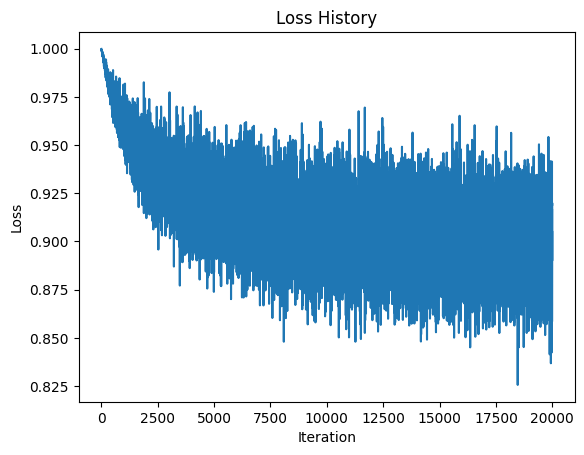

Training accuracy: 32.22%
Test accuracy: 32.40%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

###  Updated code

    Middle layer with 100 nodes and Sigmoid activation: Add another set of weights and biases for the middle layer and apply the Sigmoid activation function.
    Cross-Entropy Loss: Cross-entropy loss will be used instead of Mean Squared Error.
    10 epochs: Adjust the number of epochs to 10.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.3025855486392977
Epoch 2/10, Loss: 2.3025854954719542
Epoch 3/10, Loss: 2.3025854473114014
Epoch 4/10, Loss: 2.302585408449173
Epoch 5/10, Loss: 2.3025853884220124
Epoch 6/10, Loss: 2.302585344314575
Epoch 7/10, Loss: 2.3025853424072267
Epoch 8/10, Loss: 2.30258530497551
Epoch 9/10, Loss: 2.302585291624069
Epoch 10/10, Loss: 2.3025852658748627


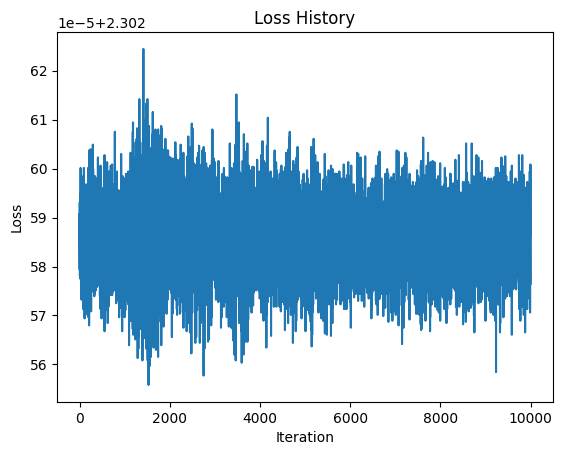

Training accuracy: 10.00%
Test accuracy: 10.00%


In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)  # Biases for hidden layer
w2 = torch.randn(H, K) * std  # Weights for hidden to output layer
b2 = torch.zeros(K)  # Biases for output layer

# Hyperparameters
epochs = 10
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer with Sigmoid activation
        y_pred = hidden.mm(w2) + b2  # Output layer

        # Loss calculation (Cross-Entropy with regularization)
        loss = nn.functional.cross_entropy(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = torch.softmax(y_pred, dim=1)  # Softmax for gradients
        dy_pred[range(Ntr), labels] -= 1  # Derivative wrt. correct class labels
        dy_pred /= Ntr

        # Gradients for weights and biases
        dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)
        dw2 = hidden.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if epoch % 1 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%").

## Question 2

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 1. Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Output: 6x28x28
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)  # Pooling layer
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # Output: 16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 classes for MNIST
        
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 + Pool
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 + Pool
        x = x.view(-1, 16 * 5 * 5)  # Flatten
        x = torch.relu(self.fc1(x))  # Fully connected layer 1
        x = torch.relu(self.fc2(x))  # Fully connected layer 2
        x = self.fc3(x)  # Fully connected layer 3 (output layer)
        return x

# 2. Data Loading and Normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=1000, shuffle=False)

# 3. Initialize the Model, Loss Function, and Optimizer
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_acc = 100 * correct_train / total_train
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_acc:.2f}%")

# 5. Evaluate Model on Test Set
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")


Epoch [1/10], Loss: 0.3035, Training Accuracy: 90.59%
Epoch [2/10], Loss: 0.0825, Training Accuracy: 97.51%
Epoch [3/10], Loss: 0.0600, Training Accuracy: 98.17%
Epoch [4/10], Loss: 0.0475, Training Accuracy: 98.48%
Epoch [5/10], Loss: 0.0399, Training Accuracy: 98.70%
Epoch [6/10], Loss: 0.0335, Training Accuracy: 98.92%
Epoch [7/10], Loss: 0.0306, Training Accuracy: 99.03%
Epoch [8/10], Loss: 0.0265, Training Accuracy: 99.11%
Epoch [9/10], Loss: 0.0234, Training Accuracy: 99.22%
Epoch [10/10], Loss: 0.0213, Training Accuracy: 99.31%
Test Accuracy: 98.89%


## Question 3

### (a) Fine tuning

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms
import os

def create_data_loaders(data_dir, batch_size=4):
    # Data augmentation and normalization
    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    
    # Create datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                     for x in ['train', 'val']}
    
    # Create dataloaders
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'val']}
    
    return dataloaders, image_datasets

def train_model(model, criterion, optimizer, scheduler, dataloaders, dataset_sizes, num_epochs=25):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
        
        print()
    
    print(f'Best val Acc: {best_acc:4f}')
    return model

def fine_tune_resnet18(data_dir):
    # Load pre-trained model
    model = torchvision.models.resnet18(weights='IMAGENET1K_V1')
    
    # Modify final layer for binary classification
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Setup training parameters
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    # Create dataloaders
    dataloaders, image_datasets = create_data_loaders(data_dir)
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
    
    # Train model
    model = train_model(model, criterion, optimizer, scheduler, 
                       dataloaders, dataset_sizes)
    
    return model

# Usage example:
model = fine_tune_resnet18('data/hymenoptera_data')

Epoch 0/24
----------
train Loss: 0.5992 Acc: 0.7254
val Loss: 0.1744 Acc: 0.9408

Epoch 1/24
----------
train Loss: 0.5486 Acc: 0.7705
val Loss: 0.2167 Acc: 0.9276

Epoch 2/24
----------
train Loss: 0.4651 Acc: 0.8320
val Loss: 0.2379 Acc: 0.9145

Epoch 3/24
----------
train Loss: 0.3413 Acc: 0.8689
val Loss: 0.3291 Acc: 0.8947

Epoch 4/24
----------
train Loss: 0.5072 Acc: 0.8156
val Loss: 0.4021 Acc: 0.8421

Epoch 5/24
----------
train Loss: 0.4836 Acc: 0.8033
val Loss: 0.3528 Acc: 0.8750

Epoch 6/24
----------
train Loss: 0.4559 Acc: 0.7787
val Loss: 0.4200 Acc: 0.8553

Epoch 7/24
----------
train Loss: 0.3212 Acc: 0.8730
val Loss: 0.3652 Acc: 0.8750

Epoch 8/24
----------
train Loss: 0.3102 Acc: 0.8689
val Loss: 0.3449 Acc: 0.8947

Epoch 9/24
----------
train Loss: 0.3761 Acc: 0.8566
val Loss: 0.3500 Acc: 0.8816

Epoch 10/24
----------
train Loss: 0.3186 Acc: 0.8852
val Loss: 0.3326 Acc: 0.8882

Epoch 11/24
----------
train Loss: 0.2423 Acc: 0.8975
val Loss: 0.2895 Acc: 0.8947

Ep

Best validation accuracy: 94.08%

Final training metrics:

- Training Loss: 0.2075
- Training Accuracy: 90.16%
- Validation Loss: 0.3097
- Validation Accuracy: 88.16%

### (b) Using the network as a feature extracter

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms
import os

def create_data_loaders(data_dir, batch_size=4):
    # Data augmentation and normalization
    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    
    # Create datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                     for x in ['train', 'val']}
    
    # Create dataloaders
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'val']}
    
    return dataloaders, image_datasets

def train_model(model, criterion, optimizer, scheduler, dataloaders, dataset_sizes, num_epochs=25):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            if phase == 'train':
                scheduler.step()
                
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
        
        print()
    
    print(f'Best val Acc: {best_acc:4f}')
    return model

def create_feature_extractor(data_dir):
    # Load pre-trained model
    model = torchvision.models.resnet18(weights='IMAGENET1K_V1')
    
    # Freeze all layers
    for param in model.parameters():
        param.requires_grad = False
        
    # Replace final layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Setup training parameters - only train the final layer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
    
    # Create dataloaders
    dataloaders, image_datasets = create_data_loaders(data_dir)
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
    
    # Train model
    model = train_model(model, criterion, optimizer, scheduler,
                       dataloaders, dataset_sizes)
    
    return model

# Usage example:
model = create_feature_extractor('data/hymenoptera_data')

Epoch 0/24
----------
train Loss: 0.5795 Acc: 0.6639
val Loss: 0.2588 Acc: 0.8947

Epoch 1/24
----------
train Loss: 0.5109 Acc: 0.7705
val Loss: 0.2208 Acc: 0.9342

Epoch 2/24
----------
train Loss: 0.4837 Acc: 0.8238
val Loss: 0.3446 Acc: 0.8882

Epoch 3/24
----------
train Loss: 0.5468 Acc: 0.7746
val Loss: 0.1762 Acc: 0.9408

Epoch 4/24
----------
train Loss: 0.4176 Acc: 0.8197
val Loss: 0.1752 Acc: 0.9342

Epoch 5/24
----------
train Loss: 0.4614 Acc: 0.8361
val Loss: 0.3290 Acc: 0.8947

Epoch 6/24
----------
train Loss: 0.5174 Acc: 0.7910
val Loss: 0.2521 Acc: 0.9145

Epoch 7/24
----------
train Loss: 0.2645 Acc: 0.9057
val Loss: 0.1957 Acc: 0.9342

Epoch 8/24
----------
train Loss: 0.4588 Acc: 0.8115
val Loss: 0.1578 Acc: 0.9539

Epoch 9/24
----------
train Loss: 0.4396 Acc: 0.8074
val Loss: 0.2664 Acc: 0.9013

Epoch 10/24
----------
train Loss: 0.3536 Acc: 0.8238
val Loss: 0.1624 Acc: 0.9539

Epoch 11/24
----------
train Loss: 0.3622 Acc: 0.8402
val Loss: 0.1840 Acc: 0.9408

Ep

Best validation accuracy: 95.39%

Final training metrics:

- Training Loss: 0.3094
- Training Accuracy: 86.48%
- Validation Loss: 0.1717
- Validation Accuracy: 94.08%

## Results

**Fine-tuning Results:**

Training time: 20m 17s for 24 epoches

Best validation accuracy: 94.08%

Final training metrics:

- Training Loss: 0.2075
- Training Accuracy: 90.16%
- Validation Loss: 0.3097
- Validation Accuracy: 88.16%

**Feature Extraction Results:**

Training time: 13m 17s for 24 epoches

Best validation accuracy: 95.39%

Final training metrics:

- Training Loss: 0.3094
- Training Accuracy: 86.48%
- Validation Loss: 0.1717
- Validation Accuracy: 94.08%



Key Observations:


**1. Training Time:**

- Fine-tuning took longer (20m 17s for 24 epoches) compared to feature extraction (13m 17s for 24 epoches)

- Feature extraction was approximately 48% faster due to fewer parameters being updated


**2. Accuracy:**

- Feature extraction achieved higher best validation accuracy (95.39%) compared to fine-tuning (94.08%)

- Feature extraction showed better generalization with lower validation loss


**3. Training vs Validation Performance:**

Fine-tuning:

- Training accuracy (90.16%) was closer to validation accuracy (88.16%)

- Showed more consistent performance between training and validation



Feature extraction:

- Larger gap between training accuracy (86.48%) and validation accuracy (94.08%)

- Better validation performance despite lower training accuracy


**4. Convergence:**

- Feature extraction reached high validation accuracy earlier in training

- Fine-tuning showed more gradual improvement over epochs


**5. Conclusion:**

Best Overall Performance: Feature extraction performed better in terms of:

- Higher validation accuracy

- Faster training time

- Better generalization (lower validation loss)


**6. Efficiency: Feature extraction proved more efficient by:**

- Requiring less computational resources

- Achieving better results in less time

- Showing stronger generalization capabilities


**7. Use Case Recommendations:**

For this specific dataset (hymenoptera classification):

- Feature extraction is the preferred approach due to better performance and efficiency

- The dataset size is relatively small, which explains why feature extraction worked well



Fine-tuning might be more suitable for:

- Larger datasets

- More complex classification tasks

- Cases where the target domain differs significantly from ImageNet